
# Analyzing Baseball Statistics and building a model to predict Games won

### Objective:

Statistical analysis plays a crucial role in Baseball and is used to evaluate teams or player performances. The insights generated from analyzing game stats drives decison making for teams i.e which players to pick, which area to improve etc. In this project data from MLB games from 1990-2010 will be analysed to determine which of 4 offensive variable and 4 defensive variables are correlated to games won and develop a model that predicts games won. 


In [7]:
#importing libraries and dataset 
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import statsmodels.formula.api as smf
import statsmodels.api as sm2
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection  import train_test_split
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('baseball_teams.csv')

In [8]:
#Selecting subset of data from 1990-2010
df_1990_2010=df[(df['Year '].between(1990,2010,inclusive=True))]

 Selecting Games Won Column, 4 offensive measurements (Runs Scored, Home Runs, Strike Outs and Walks) and 4  defensive measurements (Runs Against, Earned Runs, Errors and Strikeouts Allowed) from the dataset

In [14]:
df3=df_1990_2010[['Games_Won','Runs_Scored','Home_Runs','Strike_Outs','Walks','Runs_Against','Earned_Runs','Errors', 'Strikeouts_Allowed']]

In [17]:
df3.head()

,Games_Won,Runs_Scored,Home_Runs,Strike_Outs,Walks,Runs_Against,Earned_Runs,Errors,Strikeouts_Allowed
2047,65,682,162,1010.0,473,821,727,158,938
2048,76,669,132,962.0,660,698,644,91,776
2049,88,699,106,795.0,598,664,596,123,997
2050,80,690,147,1000.0,566,706,612,140,944
2051,94,682,106,903.0,478,633,581,124,914


In [18]:
#Checking if any null entries are present
df3.isnull().sum()

Games_Won             0
Runs_Scored           0
Home_Runs             0
Strike_Outs           0
Walks                 0
Runs_Against          0
Earned_Runs           0
Errors                0
Strikeouts_Allowed    0
dtype: int64

In [19]:
#Descriptive analysis of independent variables
df3.describe()

,Games_Won,Runs_Scored,Home_Runs,Strike_Outs,Walks,Runs_Against,Earned_Runs,Errors,Strikeouts_Allowed
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,79.445724,747.483553,161.365132,1017.419408,536.782895,747.483553,683.726974,108.421053,1017.412829
std,12.282923,93.733980,37.691082,136.028295,78.410122,97.579063,92.153091,18.933518,135.513189
min,43.000000,466.000000,68.000000,568.000000,319.000000,448.000000,407.000000,57.000000,560.000000
25%,71.000000,686.000000,135.000000,928.000000,486.750000,680.000000,620.000000,95.000000,935.500000
50%,79.500000,747.000000,160.500000,1028.000000,533.000000,745.000000,682.000000,107.000000,1021.000000
75%,88.000000,807.000000,187.000000,1105.250000,589.250000,814.000000,748.000000,122.000000,1106.250000
max,116.000000,1009.000000,264.000000,1529.000000,775.000000,1103.000000,1015.000000,173.000000,1404.000000


In [20]:
#Correlation between independent variables and Games Won
corr=df3.corr()
round(corr,4)

,Games_Won,Runs_Scored,Home_Runs,Strike_Outs,Walks,Runs_Against,Earned_Runs,Errors,Strikeouts_Allowed
Games_Won,1.0000,0.6276,0.4224,0.1253,0.5361,-0.2982,-0.2746,-0.1659,0.4918
Runs_Scored,0.6276,1.0000,0.7605,0.2724,0.6511,0.4082,0.4283,-0.0184,0.3413
Home_Runs,0.4224,0.7605,1.0000,0.4052,0.4584,0.3647,0.3854,-0.0682,0.3347
Strike_Outs,0.1253,0.2724,0.4052,1.0000,0.3392,0.3865,0.3868,0.1478,0.5115
Walks,0.5361,0.6511,0.4584,0.3392,1.0000,0.1782,0.1880,0.0119,0.3020
Runs_Against,-0.2982,0.4082,0.3647,0.3865,0.1782,1.0000,0.9888,0.3274,0.0242
Earned_Runs,-0.2746,0.4283,0.3854,0.3868,0.1880,0.9888,1.0000,0.2204,0.0370
Errors,-0.1659,-0.0184,-0.0682,0.1478,0.0119,0.3274,0.2204,1.0000,-0.0348
Strikeouts_Allowed,0.4918,0.3413,0.3347,0.5115,0.3020,0.0242,0.0370,-0.0348,1.0000


<AxesSubplot:>

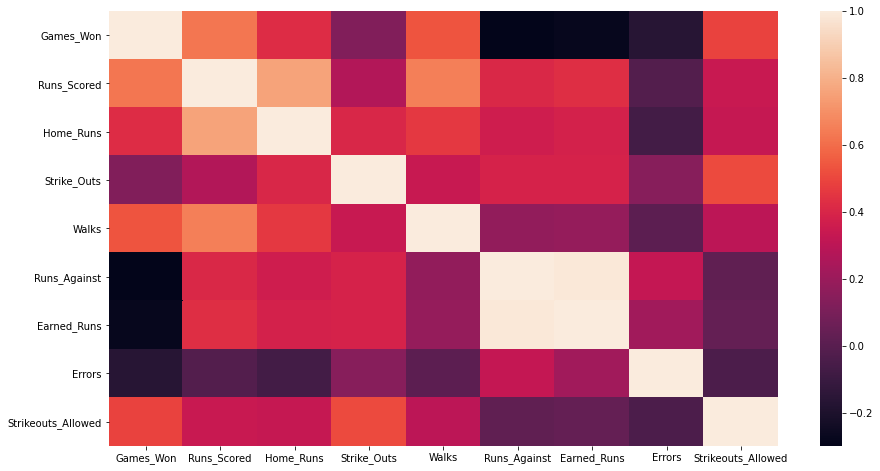

In [21]:
plt.figure(figsize = (15,8))
sns.heatmap(df3.corr())

### As per above variables Runs_Scored, Walks and Strikouts_Allowed have strongest correlation to Games won. 

# Multiple linear regression model to predict games won

Lets build the first model using the highest correlated variable as a starting point (Runs_Scored)

In [22]:
lm1 = smf.ols(formula="Games_Won ~ Runs_Scored", data=df3).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     393.8
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           6.65e-68
Time:                        17:58:48   Log-Likelihood:                -2235.0
No. Observations:                 608   AIC:                             4474.
Df Residuals:                     606   BIC:                             4483.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.9706      3.122      5.756      0.000      11.839      24.102
Runs_Scored     0.0822      0.004     19.845      0.000       0.074       0.090
==============================================================================
Omnibus:                        9.978   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.101
Skew:                           0.039   Prob(JB):                       0.0473
Kurtosis:                       2.516   Cond. No.                     6.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R value is low so 2 more variable will be added to improve model

In [33]:
lm1 = smf.ols(formula="Games_Won ~ Runs_Scored + Walks + Strikeouts_Allowed", data=df3).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     201.0
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.26e-90
Time:                        18:37:09   Log-Likelihood:                -2176.8
No. Observations:                 608   AIC:                             4362.
Df Residuals:                     604   BIC:                             4379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.1992      3.412     -0.938      0.349      -9.901       3.502
Runs_Scored            0.0536      0.005     10.561      0.000       0.044       0.064
Walks                  0.0282      0.006      4.716      0.000       0.016       0.040
Strikeouts_Allowed     0.0270      0.003      9.667      0.000       0.022       0.032
==============================================================================
Omnibus:                        4.912   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.810
Skew:                           0.216   Prob(JB):                       0.0903
Kurtosis:                       3.051   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R-squared improved however, the intercept is not significant based on the p-value (0.349 >0.05), so we will suppress the intercept

In [23]:
lm2 = smf.ols(formula="Games_Won ~ Runs_Scored + Walks + Strikeouts_Allowed -1", data=df3).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.706e+04
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                        0.00
Time:                        18:06:18   Log-Likelihood:                         -2177.2
No. Observations:                 608   AIC:                                      4360.
Df Residuals:                     605   BIC:                                      4374.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runs_Scored            0.0518      0.005     10.993      0.000       0.043       0.061
Walks                  0.0273      0.006      4.624      0.000       0.016       0.039
Strikeouts_Allowed     0.0257      0.002     10.656      0.000       0.021       0.030
==============================================================================
Omnibus:                        4.601   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.528
Skew:                           0.211   Prob(JB):                        0.104
Kurtosis:                       3.026   Cond. No.                         27.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now R-squared is high, p-value of all 3 variables are statistically significant. The F-statistic is large which means all of the predictor variables combined are jointly significant.  To conclude: this model can be used to predict Games_Won and we will now test our model 

## Testing the Model.
### We will use the model to predict games won in 2012 and 2015 by New York Yankees

In [25]:
#Selecting data needed
df_test1=df[((df['Year ']==2012) | (df['Year ']==2015)) & (df['Team_Name']=='New York Yankees')]

Predicting games won using model created above

In [28]:
lm2_predict=lm2.predict(df_test1)

In [30]:
predict_values=pd.concat([df_test1["Games_Won"], df_test1['Year '],lm2_predict],axis=1).set_index('Year ')
predict_values.columns=["Actual_Games_Won","Predicted_Games_Won"]
predict_values["Residual"]=predict_values["Actual_Games_Won"]-predict_values["Predicted_Games_Won"]

In [31]:
#Games won predicted vs actual
predict_values.head()

,Actual_Games_Won,Predicted_Games_Won,Residual
Year,,,
2012,95,90.895789,4.104211
2015,87,89.859022,-2.859022


### Evaluating the model by calculating root mean squared error

In [32]:
rmse=np.sqrt(metrics.mean_squared_error(predict_values['Actual_Games_Won'], predict_values['Predicted_Games_Won']))
print ('root mean squared error', rmse)

root mean squared error 3.536845747408076


### The RMSE is not too significant (+/-3 games) which shows that the model has good predictive capabilities for this data set 